In [196]:
# Reading CSV Files with Encodings
import pandas as pd
laptops = pd.read_csv("../dataset/laptops.csv", encoding = "latin1")
#print(laptops)
laptops.head(5)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [197]:
# Cleaning columns Names

new_columns = []

for name in laptops.columns:
    new_name = name.strip()
    new_columns.append(new_name)

print(laptops.columns)
print(new_columns)
laptops.columns = new_columns


Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')
['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen', 'CPU', 'RAM', 'Storage', 'GPU', 'Operating System', 'Operating System Version', 'Weight', 'Price (Euros)']


In [198]:
# Cleaning columns Names (continued)

def clean_col(col):
    if col == 'Operating System':
        col = 'os'
    if col == 'Operating System Version':
        col = 'os_version'
    col = col.strip()
    col = col.replace(' ', '_')
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.lower()
    return col

new_columns = []
for c in laptops.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)

laptops.columns = new_columns
print(laptops.columns)

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight',
       'price_euros'],
      dtype='object')


In [199]:
# Converting String Columns to Numeric
print(laptops["screen_size"].unique())

unique_ram = laptops["ram"].unique()
print(unique_ram)

['13.3"' '15.6"' '15.4"' '14.0"' '12.0"' '11.6"' '17.3"' '10.1"' '13.5"'
 '12.5"' '13.0"' '18.4"' '13.9"' '12.3"' '17.0"' '15.0"' '14.1"' '11.3"']
['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']


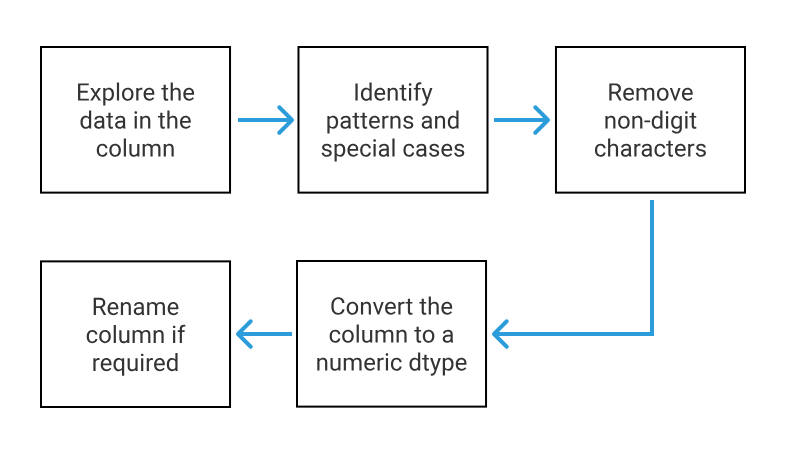

In [200]:
# Removing Non-Digit Characters

laptops["screen_size"] = laptops["screen_size"].str.replace('"', '')
print(laptops["screen_size"].unique())
print("`screen_size` dtype:", laptops["screen_size"].dtype)

laptops["ram"] = laptops["ram"].str.replace('GB', '')
print(laptops["ram"].unique())
print("screen_size dtype:", laptops["ram"].dtype)

['13.3' '15.6' '15.4' '14.0' '12.0' '11.6' '17.3' '10.1' '13.5' '12.5'
 '13.0' '18.4' '13.9' '12.3' '17.0' '15.0' '14.1' '11.3']
`screen_size` dtype: object
['8' '16' '4' '2' '12' '6' '32' '24' '64']
screen_size dtype: object


In [201]:
# Converting Columns to Numeric dtypes
laptops["screen_size"] = laptops["screen_size"].astype(float)
print(laptops["screen_size"].unique())
print("`screen_size` dtype:", laptops["screen_size"].dtype)

laptops["ram"] = laptops["ram"].astype(float)
print(laptops["ram"].unique())
print("`ram` dtype:", laptops["ram"].dtype)


[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
`screen_size` dtype: float64
[ 8. 16.  4.  2. 12.  6. 32. 24. 64.]
`ram` dtype: float64


In [202]:
# Renaming Columns

# O implace true, garante que a mudança seja atrelada ao DataFrame original
laptops.rename({"screen_size": "screen_size_inches"}, axis=1, inplace = True)
laptops.rename({"ram": "ram_gb"}, axis=1, inplace = True)
ram_gb_desc = laptops['ram_gb'].describe()
print(ram_gb_desc)


count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: ram_gb, dtype: float64


In [203]:
# Extracting Values from Strings
gpu_split = laptops["gpu"].str.split()
laptops['gpu_manufacturer'] = gpu_split.str[0]
gpu_manufacturer_counts = laptops['gpu_manufacturer'].value_counts()

cpu_split = laptops["cpu"].str.split()
laptops['cpu_manufacturer'] = cpu_split.str[0]
cpu_manufacturer_counts = laptops['cpu_manufacturer'].value_counts()

print(cpu_manufacturer_counts)
print(gpu_manufacturer_counts)


cpu_manufacturer
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64
gpu_manufacturer
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64


In [204]:
# Correcting Bad Values
print(laptops["os"].unique())

mapping_dict = {'macOS':'macOS', 'No OS':'No OS', 'Windows':'Windows', 'Mac OS': 'macOS', 'Linux':'Linux', 'Android':'Android', 'Chrome OS':'Chrome OS'}

laptops['os'] = laptops["os"].map(mapping_dict)
print(laptops['os'].value_counts())


['macOS' 'No OS' 'Windows' 'Mac OS' 'Linux' 'Android' 'Chrome OS']
os
Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: count, dtype: int64


In [205]:
# Dropping Missing Values
print(laptops.isnull().sum())

laptops_no_null_rows = laptops.dropna(axis = 0)
laptops_no_null_cols = laptops.dropna(axis = 1)

manufacturer            0
model_name              0
category                0
screen_size_inches      0
screen                  0
cpu                     0
ram_gb                  0
storage                 0
gpu                     0
os                      0
os_version            170
weight                  0
price_euros             0
gpu_manufacturer        0
cpu_manufacturer        0
dtype: int64


In [206]:
# Filling Missing Values
print(laptops["os_version"].value_counts(dropna=False))

os_with_null_v = laptops.loc[laptops["os_version"].isnull(), "os"]
print(os_with_null_v.value_counts())

laptops.loc[laptops["os"] == "macOS", "os_version"] = "X"
value_counts_before = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()
laptops.loc[laptops['os'] == 'No OS', 'os_version'] == 'Not Applicable'
value_counts_after = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()

os_version
10      1072
NaN      170
7         45
X          8
10 S       8
Name: count, dtype: int64
os
No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: count, dtype: int64


In [207]:
# Challenge: Clean a String Column

laptops['weight'] =  laptops['weight'].str.replace('kgs', '').str.replace('kg', '').astype(float)
laptops.rename({"weight": "weight_kg"}, axis=1, inplace = True)
laptops.to_csv('laptops_cleaned.csv', index=False)